In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from datetime import datetime
%matplotlib inline

In [184]:
pd.set_option('display.max_columns', 70) #view 70 columns

<hr style="border:1px solid gray"> </hr>

## EDA
- Create visualizations to understand dataset
    - understand the distribution of different columns
    - check for multicollinearity
- Check that the dataset meets the assumptions (for regression)
[//]: # "- Check the balance of the different classes (for classification task)"
[//]: # "- Check that the dataset meets the assumptions (for regression task)"

In [185]:
df_sqft = pd.read_csv('data/clean_data_sqft.csv').iloc[:, 1:]
df_grade = pd.read_csv('data/clean_data_grade.csv').iloc[:, 1:]
display(df_sqft.head())
display(df_grade.head())

,date,id,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,zipcode,lat,long,renovated,basement,multilevel,bedrooms_bin,bathrooms_bin,grade_bin,age,month,yr_quarter
0,2014-10-13,7129300520,221900.0,3,1180,5650,0.0,0,3,98178,47.5112,-122.257,0,0,0,3,0.5-1.75,average,66,10,4
1,2014-12-09,6414100192,538000.0,3,2570,7242,0.0,0,3,98125,47.7210,-122.319,1,1,1,3,2-2.5,average,70,12,4
2,2015-02-25,5631500400,180000.0,2,770,10000,0.0,0,3,98028,47.7379,-122.233,0,0,0,1-2,0.5-1.75,below_average,88,2,1
3,2014-12-09,2487200875,604000.0,4,1960,5000,0.0,0,5,98136,47.5208,-122.393,0,1,0,4,2.75_more,average,56,12,4
4,2015-02-18,1954400510,510000.0,3,1680,8080,0.0,0,3,98074,47.6168,-122.045,0,0,0,3,2-2.5,good,34,2,1


,date,id,price,bedrooms,sqft_lot,waterfront,view,condition,grade,zipcode,lat,long,renovated,basement,multilevel,bedrooms_bin,bathrooms_bin,grade_bin,age,month,yr_quarter
0,2014-10-13,7129300520,221900.0,3,5650,0.0,0,3,7,98178,47.5112,-122.257,0,0,0,3,0.5-1.75,average,66,10,4
1,2014-12-09,6414100192,538000.0,3,7242,0.0,0,3,7,98125,47.7210,-122.319,1,1,1,3,2-2.5,average,70,12,4
2,2015-02-25,5631500400,180000.0,2,10000,0.0,0,3,6,98028,47.7379,-122.233,0,0,0,1-2,0.5-1.75,below_average,88,2,1
3,2014-12-09,2487200875,604000.0,4,5000,0.0,0,5,7,98136,47.5208,-122.393,0,1,0,4,2.75_more,average,56,12,4
4,2015-02-18,1954400510,510000.0,3,8080,0.0,0,3,8,98074,47.6168,-122.045,0,0,0,3,2-2.5,good,34,2,1


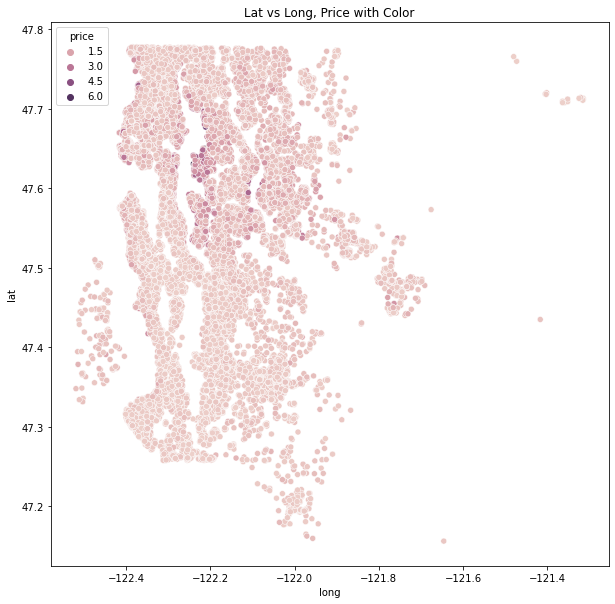

In [186]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='long',y='lat',hue='price',data=df_sqft)
plt.title('Lat vs Long, Price with Color');

#### Split continuous and categorical variables

In [187]:
def cats_and_conts(df):
    conts = []
    cats = []
    for col in df.columns:
        if df[col].nunique() < 20:
            cats.append(col)
        else:
            conts.append(col)
    return df[cats], df[conts]
df1_cats, df1_conts = cats_and_conts(df_sqft)
print('DF with sqft (cats/conts):\n', df1_cats.columns, '\n', df1_conts.columns)
df2_cats, df2_conts = cats_and_conts(df_grade)
print('\nDF with grade (cats/conts):\n', df2_cats.columns, '\n', df2_conts.columns)

DF with sqft (cats/conts):
 Index(['bedrooms', 'waterfront', 'view', 'condition', 'renovated', 'basement',
       'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin', 'month',
       'yr_quarter'],
      dtype='object') 
 Index(['date', 'id', 'price', 'sqft_living', 'sqft_lot', 'zipcode', 'lat',
       'long', 'age'],
      dtype='object')

DF with grade (cats/conts):
 Index(['bedrooms', 'waterfront', 'view', 'condition', 'grade', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'month', 'yr_quarter'],
      dtype='object') 
 Index(['date', 'id', 'price', 'sqft_lot', 'zipcode', 'lat', 'long', 'age'], dtype='object')


#### Model 1 categorical variables: one hot encode

In [188]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, MinMaxScaler, StandardScaler


In [189]:
df_m1_cats = df1_cats[['waterfront', 'condition', 'renovated', 'basement', 'multilevel',
        'bedrooms_bin', 'bathrooms_bin','grade_bin', 'yr_quarter']].astype('category')
df_m1_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   waterfront     21417 non-null  category
 1   condition      21417 non-null  category
 2   renovated      21417 non-null  category
 3   basement       21417 non-null  category
 4   multilevel     21417 non-null  category
 5   bedrooms_bin   21417 non-null  category
 6   bathrooms_bin  21417 non-null  category
 7   grade_bin      21417 non-null  category
 8   yr_quarter     21417 non-null  category
dtypes: category(9)
memory usage: 189.6 KB


In [190]:
df_m1_cats = pd.get_dummies(df_m1_cats, drop_first = True)
df_m1_cats.head()

,waterfront_1.0,condition_2,condition_3,condition_4,condition_5,renovated_1,basement_1,multilevel_1,bedrooms_bin_3,bedrooms_bin_4,bedrooms_bin_5_more,bathrooms_bin_2-2.5,bathrooms_bin_2.75_more,grade_bin_below_average,grade_bin_good,grade_bin_great,yr_quarter_2,yr_quarter_3,yr_quarter_4
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [191]:
# from sklearn.preprocessing import LabelBinarizer

# lb = LabelBinarizer()
# dummies = lb.fit_transform(df_cats)
# dum_df = pd.DataFrame(df_cats, columns=lb.classes_)
# dum_df

#### Model 1 continuous variables: transform

In [192]:
df_m1_conts = df1_conts[['price', 'sqft_living', 'sqft_lot','age']]
df_m1_conts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21417 non-null  float64
 1   sqft_living  21417 non-null  int64  
 2   sqft_lot     21417 non-null  int64  
 3   age          21417 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 669.4 KB


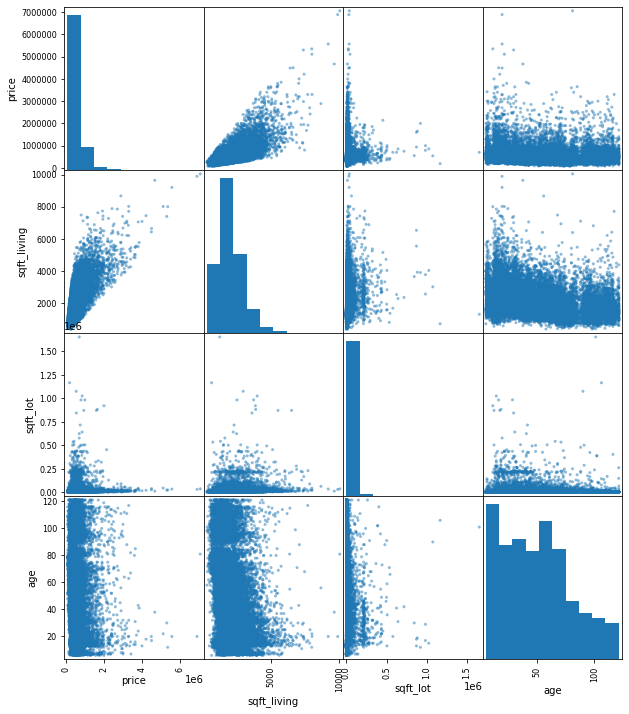

In [193]:
pd.plotting.scatter_matrix(df_m1_conts, figsize=(10,12));

In [194]:
non_normal = ['price', 'sqft_living', 'sqft_lot', 'age']
for col in non_normal:
    df_m1_conts[col] = df_m1_conts[col].map(lambda x: np.log(x))

<ipython-input-194-d07b38e1cb48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m1_conts[col] = df_m1_conts[col].map(lambda x: np.log(x))


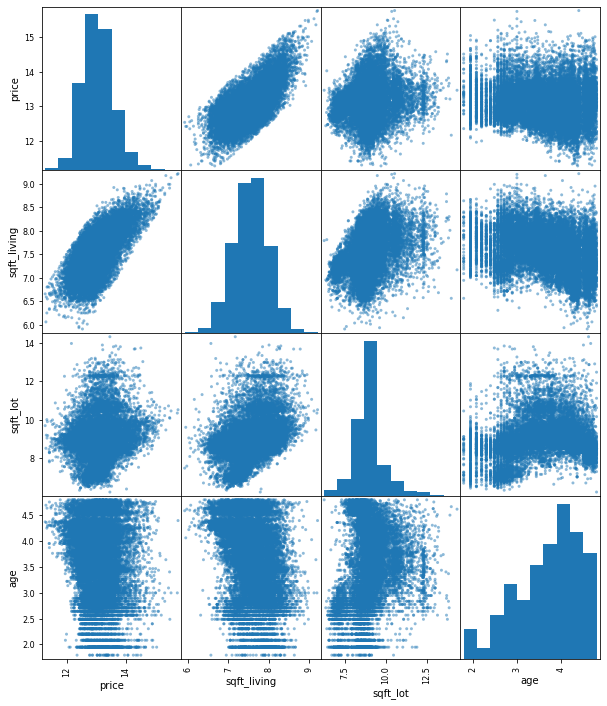

In [195]:
pd.plotting.scatter_matrix(df_m1_conts, figsize=(10,12));

In [196]:
df_m1 = pd.concat([df_m1_cats, df_m1_conts], axis = 1)
display(df_m1)

,waterfront_1.0,condition_2,condition_3,condition_4,condition_5,renovated_1,basement_1,multilevel_1,bedrooms_bin_3,bedrooms_bin_4,bedrooms_bin_5_more,bathrooms_bin_2-2.5,bathrooms_bin_2.75_more,grade_bin_below_average,grade_bin_good,grade_bin_great,yr_quarter_2,yr_quarter_3,yr_quarter_4,price,sqft_living,sqft_lot,age
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12.309982,7.073270,8.639411,4.189655
1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,13.195614,7.851661,8.887653,4.248495
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12.100712,6.646391,9.210340,4.477337
3,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,13.311329,7.580700,8.517193,4.025352
4,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,13.142166,7.426549,8.997147,3.526361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,12.793859,7.333023,7.030857,2.484907
21413,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,12.899220,7.745003,8.667852,1.945910
21414,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,12.904459,6.927558,7.207860,2.484907
21415,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,12.899220,7.377759,7.778211,2.833213


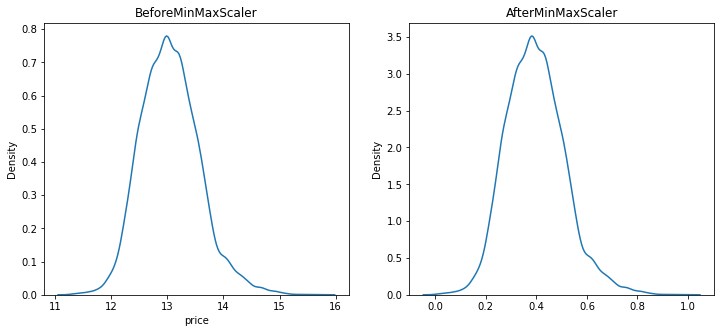

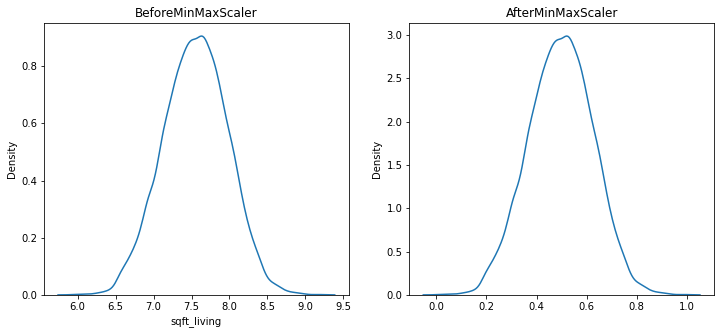

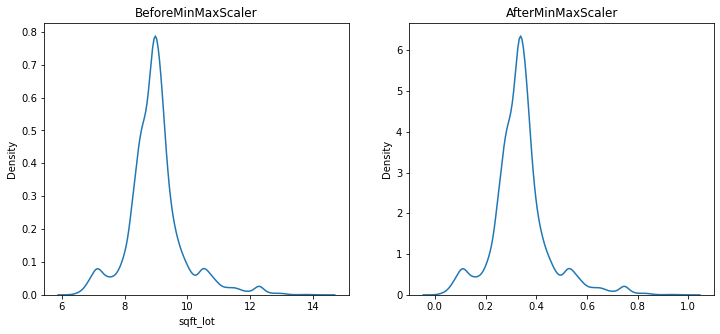

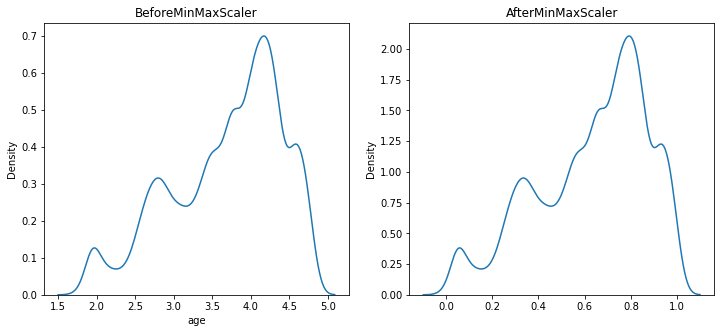

In [197]:
def plots(df, col, t):
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(df[col])
    plt.title('Before' + str(t).split('(')[0]) 
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[col]]).flatten()
    sns.kdeplot(p1)
    plt.title('After' + str(t).split('(')[0])    
    
for col in df_m1_conts.columns:
    plots(df_m1_conts.copy(), col, MinMaxScaler())

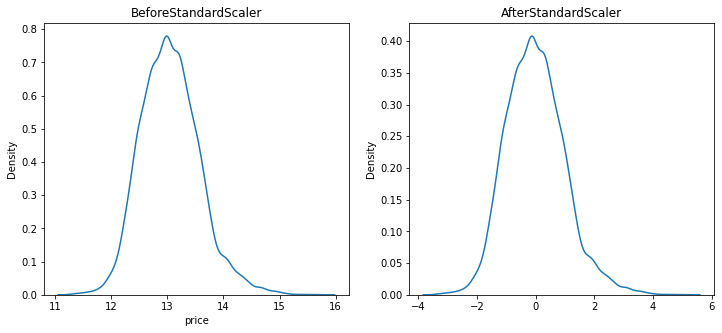

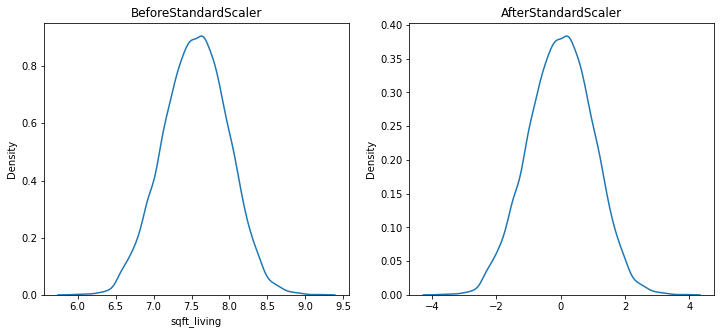

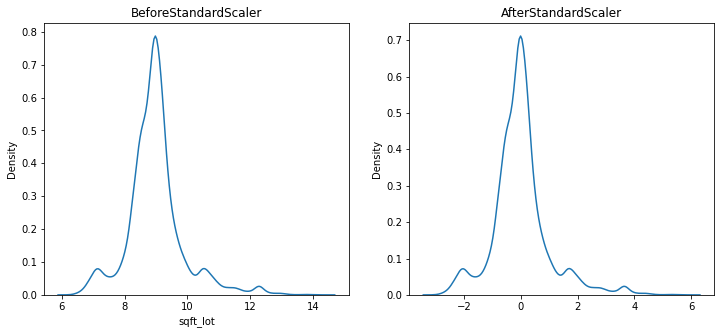

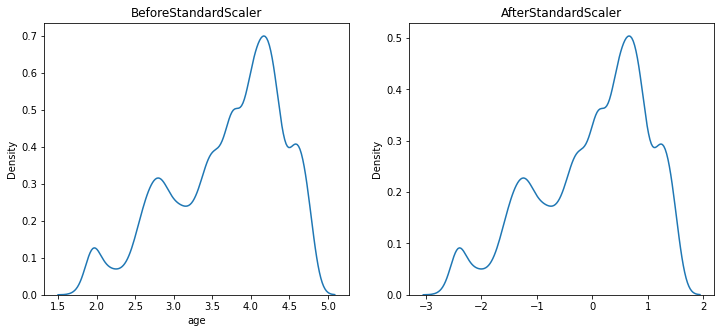

In [198]:
for col in df_m1_conts.columns:
    plots(df_m1_conts.copy(), col, StandardScaler())

<hr style="border:1px solid gray"> </hr>

## Model 1
- Build and tune the model(s)
- Define a threshold for success
- Select ML algorithms to test
- Tune promising algorithms to improve results

In [199]:
import statsmodels.api as sm
import statsmodels.formula as smf # ols method
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn 
from scipy import stats
from sklearn.model_selection import train_test_split

In [213]:
df_m1.columns = ['waterfront_one', 'condition_two', 'condition_three', 'condition_four',
       'condition_five', 'renovated_one', 'basement_one', 'multilevel_one',
       'bedrooms_bin_three', 'bedrooms_bin_four', 'bedrooms_bin_five_more',
       'bathrooms_bin_two_two_pt_five', 'bathrooms_bin_tow_pt_seven_five_more',
       'grade_bin_below_average', 'grade_bin_good', 'grade_bin_great',
       'yr_quarter_two', 'yr_quarter_three', 'yr_quarter_four', 'price', 'sqft_living',
       'sqft_lot', 'age']

In [214]:
df_y = df_m1['price']
df_X = df_m1.drop('price', axis = 1)
# X = 
df_X

,waterfront_one,condition_two,condition_three,condition_four,condition_five,renovated_one,basement_one,multilevel_one,bedrooms_bin_three,bedrooms_bin_four,bedrooms_bin_five_more,bathrooms_bin_two_two_pt_five,bathrooms_bin_tow_pt_seven_five_more,grade_bin_below_average,grade_bin_good,grade_bin_great,yr_quarter_two,yr_quarter_three,yr_quarter_four,sqft_living,sqft_lot,age
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,7.073270,8.639411,4.189655
1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,7.851661,8.887653,4.248495
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6.646391,9.210340,4.477337
3,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,7.580700,8.517193,4.025352
4,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,7.426549,8.997147,3.526361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,7.333023,7.030857,2.484907
21413,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,7.745003,8.667852,1.945910
21414,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,6.927558,7.207860,2.484907
21415,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,7.377759,7.778211,2.833213


In [216]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2)

In [217]:
X = '+'.join(list(df_X.columns))
y = list(df_y.to_frame().columns)[0]
f = str(y) + '~' + X 

model = ols(formula= f, data= df_m1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1563.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        05:58:13   Log-Likelihood:                -6262.0
No. Observations:               21417   AIC:                         1.257e+04
Df Residuals:                   21394   BIC:                         1.275e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                8.5340      0.097     88.372      0.000       8.345       8.723
waterfront_one                           0.6063      0.027     22.238      0.000       0.553       0.660
condition_two                           -0.0442      0.066     -0.666      0.505      -0.174       0.086
condition_three                          0.0884      0.062      1.434      0.152      -0.032       0.209
condition_four                           0.1141      0.062      1.852      0.064      -0.007       0.235
condition_five                           0.2003      0.062      3.232      0.001       0.079       0.322
renovated_one                            0.0682      0.013      5.350      0.000       0.043       0.093
basement_one                             0.0527      0.006      9.495      0.000       0.042       0.064
multilevel_one                           0.0782      0.006     12.966      0.000       0.066       0.090
bedrooms_bin_three                      -0.1460      0.008    -19.059      0.000      -0.161      -0.131
bedrooms_bin_four                       -0.1904      0.009    -20.827      0.000      -0.208      -0.173
bedrooms_bin_five_more                  -0.1910      0.012    -15.933      0.000      -0.214      -0.167
bathrooms_bin_two_two_pt_five           -0.0256      0.006     -3.981      0.000      -0.038      -0.013
bathrooms_bin_tow_pt_seven_five_more     0.0979      0.009     10.654      0.000       0.080       0.116
grade_bin_below_average                 -0.2061      0.009    -24.096      0.000      -0.223      -0.189
grade_bin_good                           0.2126      0.006     34.798      0.000       0.201       0.225
grade_bin_great                          0.5538      0.009     64.542      0.000       0.537       0.571
yr_quarter_two                           0.0145      0.006      2.252      0.024       0.002       0.027
yr_quarter_three                        -0.0142      0.007     -2.136      0.033      -0.027      -0.001
yr_quarter_four                         -0.0291      0.007     -4.188      0.000      -0.043      -0.015
sqft_living                              0.5558      0.011     49.374      0.000       0.534       0.578
sqft_lot                                -0.0539      0.003    -17.792      0.000      -0.060      -0.048
age                                      0.1712      0.004     38.339      0.000       0.162       0.180
==============================================================================
Omnibus:                       72.560   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.067
Skew:                          -0.003   Prob(JB):                     8.36e-22
Kurtosis:                       3.330

In [ ]:
outcome = 'price'
x_cols = df_orig.dropna().drop(['price', 'sqft_basement', 'id',
                                'date', 'sqft_above', 'sqft_living15',
                                'sqft_lot'], axis = 1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors 
model2 = ols(formula= f, data= df_orig).fit()
model2.summary()

In [ ]:
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

<hr style="border:1px solid gray"> </hr>

## Model 2
- Build and tune the model(s)
- Define a threshold for success
- Select ML algorithms to test
- Tune promising algorithms to improve results

<hr style="border:1px solid gray"> </hr>

## Model 3
- Build and tune the model(s)
- Define a threshold for success
- Select ML algorithms to test
- Tune promising algorithms to improve results

<hr style="border:1px solid gray"> </hr>

## Interpret Results
- Interpret results of the model(s)
- Communicate results to the stakeholders
- Identify next steps

#### Conclusion

#### Next Steps

#### Notes and extra code
In the log-log- model, see that

𝛽1=∂log(𝑦)∂log(𝑥).

Recall that

∂log(𝑦)∂𝑦=1𝑦

or

∂log(𝑦)=∂𝑦𝑦.

Multiplying this latter formulation by 100 gives the percent change in 𝑦. We have analogous results for 𝑥.

Using this fact, we can interpret 𝛽1 as the percent change in 𝑦 for a 1 percent change in 𝑥.

Following the same logic, for the level-log model, we have

𝛽1=∂𝑦∂log(𝑥)=100∂𝑦100×∂log(𝑥).

or 𝛽1/100 is the unit change in 𝑦 for a one percent change in 𝑥.

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='long',y='lat',hue='price',data=df)
plt.title('Lat vs Long, Price with Color')

In [ ]:
df['sector_1'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_2'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_3'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_4'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_5'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_6'] = df.iloc[(df.lat > 122) & (df.long < )]

#### Comparing models with/without transformations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels
from sklearn.metrics import r2_score


df = pd.read_csv('data/kc_house_data.csv')
df.info()

In [ ]:
data = df.copy()

y = data['price']
X = data.drop(['price', 'date', 'id', 'zipcode', 'sqft_above'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

#### Student

In [ ]:
zipcodes = pd.get_dummies(df['zipcode'], prefix = 'zipcode')
zipcodes

In [ ]:
df_with_zip = pd.concat([df, zipcodes], axis = 1)

In [ ]:
df_with_zip.info()

In [ ]:
import statsmodels.formula as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
outcome = 'price'
x_cols = df_with_zip.drop(['price', 'date', 'sqft_basement', 'id', 'zipcode', 'sqft_above'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [ ]:
model = ols(formula = f, data = df_with_zip).fit()
model.summary2()

In [ ]:
df.loc[(df.lat > 47.5) & (df.long > -122.2), "sector_1"] = 1
df.info()

In [ ]:
df.fillna(value = 2)

In [ ]:
plt.figure(figsize=(12,9))
sns.scatterplot(x = "long", y = "lat", hue = "sector_1" , data=df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = df_with_zip.copy()

In [ ]:
y = data['price']
X = data.drop(['price', 'date', 'sqft_basement', 'id', 'zipcode', 'sqft_above'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
len(X_test)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

In [ ]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

In [ ]:
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

In [ ]:
print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_hat_test)

In [ ]:
residuals = (y_test - y_hat_test)

In [ ]:
import statsmodels

In [ ]:
statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

In [ ]:
np.sqrt(mse_test) / df_with_zip.price.mean()

#### Folium

In [11]:
df.lat.min()

In [ ]:
# !pip install folium

In [ ]:
import folium


In [ ]:
kc_coordinates = (47.54, -121.98)


In [ ]:
kc_map = folium.Map(location = kc_coordinates)


In [ ]:
kc_map


In [ ]:
# manipulate df
df.groupby(['zipcode']).median()[['lat', 'long', 'price']].values.tolist()

In [ ]:
from folium.plugins import HeatMap

In [ ]:
HeatMap(data = df.groupby(['zipcode']).median()[['lat', 'long', 'price']].values.tolist()).add_to(kc_map)


In [ ]:
display(kc_map)


#### Plotly

In [ ]:
# !pip install plotly


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x = "bedrooms", y = "price")
fig.show()

In [ ]:
px.box(df, x = "grade", y = "price")

In [ ]:
px.scatter(df, x = "sqft_living", y = "price", trendline= "ols")